In [22]:
import pandas as pd

s=pd.date_range('2020-01-01', '2020-01-10', freq='10H').to_series()

feats=pd.DataFrame({
    'day_of_week': s.dt.day_of_week.values,
    'day_of_year': s.dt.day_of_year.values,
    'hour': s.dt.hour.values,
    'is_leap_year': s.dt.is_leap_year.values,
    'quarter': s.dt.quarter.values,
    'week_of_year': s.dt.isocalendar().week.values
})
feats.index=s
feats

,day_of_week,day_of_year,hour,is_leap_year,quarter,week_of_year
2020-01-01 00:00:00,2,1,0,True,1,1
2020-01-01 10:00:00,2,1,10,True,1,1
2020-01-01 20:00:00,2,1,20,True,1,1
2020-01-02 06:00:00,3,2,6,True,1,1
2020-01-02 16:00:00,3,2,16,True,1,1
2020-01-03 02:00:00,4,3,2,True,1,1
2020-01-03 12:00:00,4,3,12,True,1,1
2020-01-03 22:00:00,4,3,22,True,1,1
2020-01-04 08:00:00,5,4,8,True,1,1
2020-01-04 18:00:00,5,4,18,True,1,1


In [93]:
df=pd.DataFrame({'date': pd.to_datetime(['2016-09-01', '2017-04-01', '2017-08-01', '2017-12-01', '2017-09-01', '2017-12-01']),
                'customer_id': [125, 877, 157, 885, 125, 125],
                'cat1': [2,4,3,5,3,5],
                'cat2': [2,1,3,1,2,3],
                'cat3': [0,0,1,1,1,7],
                'num1': [-0.5186, 0.4158, -2.0445, -0.2675, -1.4568,3.322]})
df

,date,customer_id,cat1,cat2,cat3,num1
0,2016-09-01,125,2,2,0,-0.5186
1,2017-04-01,877,4,1,0,0.4158
2,2017-08-01,157,3,3,1,-2.0445
3,2017-12-01,885,5,1,1,-0.2675
4,2017-09-01,125,3,2,1,-1.4568
5,2017-12-01,125,5,3,7,3.3220


In [94]:
def feat_gen(df):
    df=df.copy()
    df.loc[:, 'year']=df['date'].dt.year
    df.loc[:, 'month']=df['date'].dt.month
    df.loc[:, 'week_of_year']=df['date'].dt.isocalendar().week
    df.loc[:, 'day_of_week']=df['date'].dt.day_of_week
    df.loc[: ,' is_weekend']=(df['date'].dt.weekday>5).astype(int)

    aggs={}
    aggs['month']=['nunique', 'mean']
    aggs['week_of_year']=['nunique', 'mean']
    aggs['num1']=['sum','max','min','mean']
    aggs['customer_id']=['size', 'nunique']
    
    agg_df=df.groupby('customer_id').agg(aggs).reset_index()
    agg_df.columns=['_'.join(i) for i in agg_df.columns]
    return agg_df



In [95]:
df_full=pd.concat([df, feat_gen(df)], axis=1, join="outer")
df_full

,date,customer_id,cat1,cat2,cat3,num1,customer_id_,month_nunique,month_mean,week_of_year_nunique,week_of_year_mean,num1_sum,num1_max,num1_min,num1_mean,customer_id_size,customer_id_nunique
0,2016-09-01,125,2,2,0,-0.5186,125.0,2.0,10.0,2.0,39.333333,1.3466,3.3220,-1.4568,0.448867,3.0,1.0
1,2017-04-01,877,4,1,0,0.4158,157.0,1.0,8.0,1.0,31.0,-2.0445,-2.0445,-2.0445,-2.044500,1.0,1.0
2,2017-08-01,157,3,3,1,-2.0445,877.0,1.0,4.0,1.0,13.0,0.4158,0.4158,0.4158,0.415800,1.0,1.0
3,2017-12-01,885,5,1,1,-0.2675,885.0,1.0,12.0,1.0,48.0,-0.2675,-0.2675,-0.2675,-0.267500,1.0,1.0
4,2017-09-01,125,3,2,1,-1.4568,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN
5,2017-12-01,125,5,3,7,3.3220,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
### IMPORTANT--fill in duplicate rows wuth aggregated vals ###

for i in df_full.columns[len(df)+1:]:
    df_full[i]=df_full.groupby('customer_id')[i].apply(lambda x: x.ffill().bfill())
    
df_full

,date,customer_id,cat1,cat2,cat3,num1,customer_id_,month_nunique,month_mean,week_of_year_nunique,week_of_year_mean,num1_sum,num1_max,num1_min,num1_mean,customer_id_size,customer_id_nunique
0,2016-09-01,125,2,2,0,-0.5186,125.0,2.0,10.0,2.0,39.333333,1.3466,3.3220,-1.4568,0.448867,3.0,1.0
1,2017-04-01,877,4,1,0,0.4158,157.0,1.0,8.0,1.0,31.0,-2.0445,-2.0445,-2.0445,-2.044500,1.0,1.0
2,2017-08-01,157,3,3,1,-2.0445,877.0,1.0,4.0,1.0,13.0,0.4158,0.4158,0.4158,0.415800,1.0,1.0
3,2017-12-01,885,5,1,1,-0.2675,885.0,1.0,12.0,1.0,48.0,-0.2675,-0.2675,-0.2675,-0.267500,1.0,1.0
4,2017-09-01,125,3,2,1,-1.4568,NaN,2.0,10.0,2.0,39.333333,1.3466,3.3220,-1.4568,0.448867,3.0,1.0
5,2017-12-01,125,5,3,7,3.3220,NaN,2.0,10.0,2.0,39.333333,1.3466,3.3220,-1.4568,0.448867,3.0,1.0


In [101]:
import numpy as np

df=pd.DataFrame(np.random.rand(100,2),
               columns=[f'f{i}' for i in range(1,3)])

In [109]:
from sklearn import preprocessing

pf=preprocessing.PolynomialFeatures(
    degree=3,
    interaction_only=False,
    include_bias=False
)

poly_feats=pf.fit_transform(df)
df_transformed=pd.DataFrame(poly_feats, columns=pf.get_feature_names_out())
df_transformed.head()

,f1,f2,f1^2,f1 f2,f2^2,f1^3,f1^2 f2,f1 f2^2,f2^3
0,0.717131,0.025475,0.514277,0.018269,0.000649,0.368804,0.013101,0.000465,0.000017
1,0.872787,0.332075,0.761757,0.289830,0.110274,0.664852,0.252960,0.096245,0.036619
2,0.888383,0.336992,0.789224,0.299378,0.113563,0.701133,0.265962,0.100888,0.038270
3,0.433433,0.233288,0.187864,0.101115,0.054423,0.081427,0.043827,0.023589,0.012696
4,0.743949,0.513824,0.553460,0.382259,0.264015,0.411746,0.284381,0.196414,0.135658


In [112]:
df['f1_10_bin']=pd.cut(df['f1'],10, labels=False)
df['f1_100_bin']=pd.cut(df['f1'],100, labels=False)
df.head()

,f1,f2,f1_10_bin,f1_100_bin
0,0.717131,0.025475,7,71
1,0.872787,0.332075,8,87
2,0.888383,0.336992,8,89
3,0.433433,0.233288,4,41
4,0.743949,0.513824,7,74


In [117]:
df['f3']=np.random.randint(1000, 10000, 100)

7878688.991818182

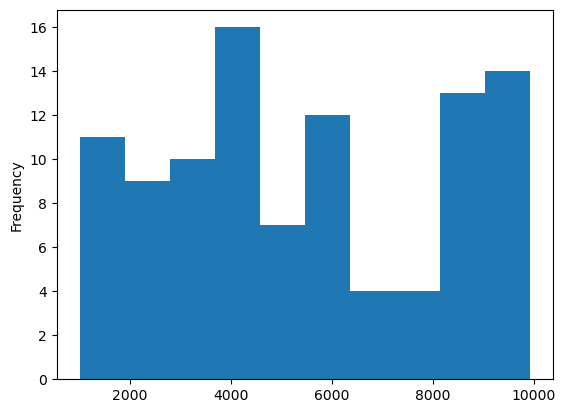

In [119]:
df['f3'].plot(kind='hist');
df['f3'].var()

0.38739519332086747

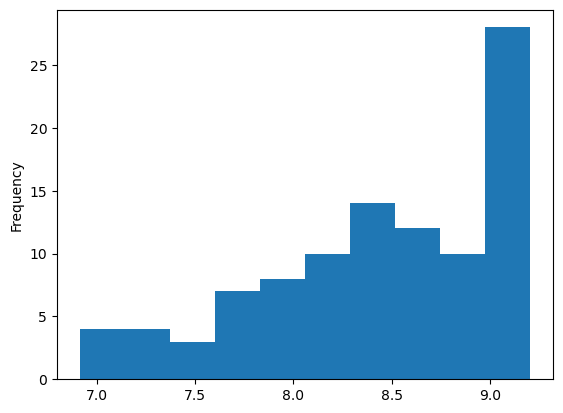

In [121]:
df['f3']=df['f3'].apply(lambda x: np.log(x+1))
df['f3'].plot(kind='hist');
df['f3'].var()

In [146]:
from sklearn import impute

X=np.random.randint(1, 15, (10,6)).astype(float)
X.ravel()[np.random.choice(X.size, 10, replace=False)] = np.nan
knn_imputer=impute.KNNImputer(n_neighbors=2)
knn_imputer.fit_transform(X)

array([[ 6. , 14. ,  4. ,  2. , 11. ,  4. ],
       [ 9.5,  7. ,  3. ,  7.5, 10. ,  3. ],
       [ 5. , 12. ,  5.5,  3. ,  7. , 14. ],
       [ 9. ,  2. ,  2. ,  7. ,  3. ,  7. ],
       [ 6. , 11. , 10. ,  4. ,  5.5, 11.5],
       [ 1. ,  6. , 11. ,  7. ,  4. , 10. ],
       [10. , 13. ,  1. ,  7. ,  9. , 13. ],
       [13. , 14. ,  2. , 13. ,  9. ,  4. ],
       [ 4. ,  7. ,  9. ,  9. ,  5. , 11. ],
       [ 7. ,  8. ,  8. ,  7. ,  4. ,  9. ]])